In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from econometron.utils.data_preparation import TransformTS
from econometron.Models.VectorAutoReg import SVAR

In [2]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
Inflation=pd.read_csv("../../Data_Fred/inflation.csv", index_col=0, parse_dates=True)
Interest_Rate=pd.read_csv("../../Data_Fred/int_rate.csv", index_col=0, parse_dates=True)


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Stationary, p-value: 0.0000, ADF Statistic: -4.9856
Column DPCCRV1Q225SBEA: Stationary, p-value: 0.0276, ADF Statistic: -3.0857
Column DFF: Stationary, p-value: 0.0000, ADF Statistic: -5.6126

Summary Statistics:
               GDP  DPCCRV1Q225SBEA         DFF
count   140.000000     1.410000e+02  140.000000
mean    172.066757     2.834612e-16   -0.026000
std     261.390203     1.116470e+00    0.719533
min   -1792.213000    -2.962411e+00   -2.720000
25%      96.405500    -6.624113e-01   -0.170000
50%     151.305500    -2.624113e-01    0.000000
75%     222.718000     4.375887e-01    0.242500
max    1749.107000     3.937589e+00    2.270000

NaN Counts:
GDP                1
DPCCRV1Q225SBEA    0
DFF                1
dtype: int64

Correlation Matrix:
                      GDP  DPCCRV1Q225SBEA       DFF
GDP              1.000000         0.500033  0.261576
DPCCRV1Q225SBEA  0.500033         1.000000  0.169277
DFF         

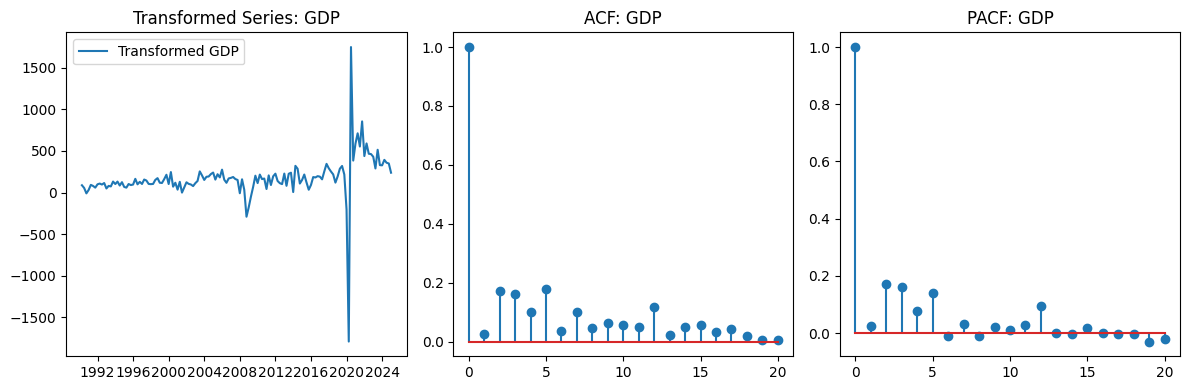

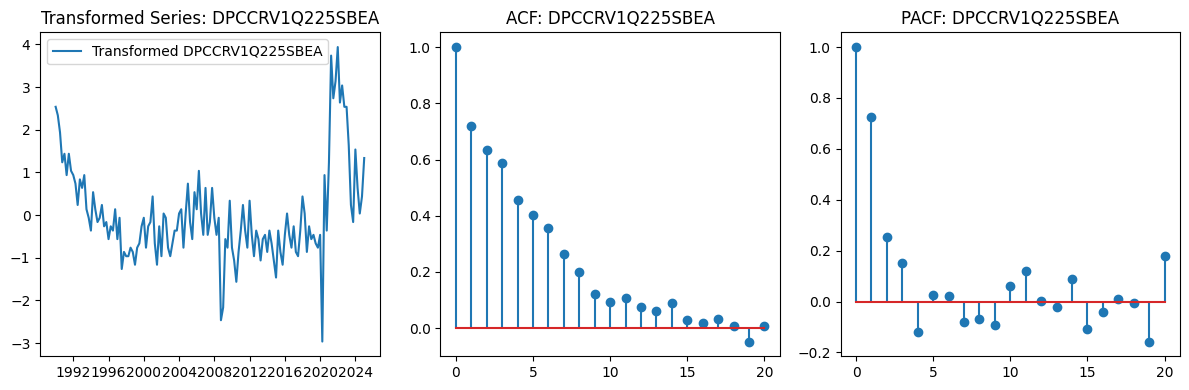

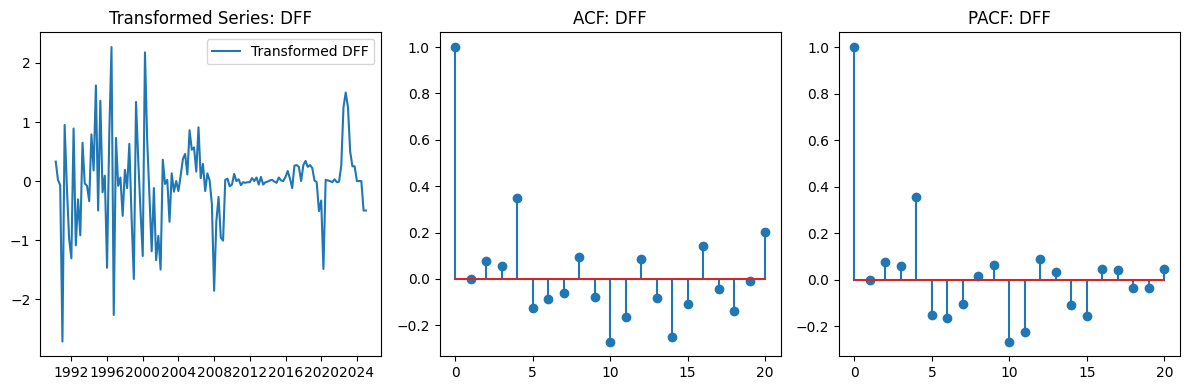

In [3]:
mac_data=pd.concat([GDP, Inflation, Interest_Rate], axis=1).dropna()
TSP=TransformTS(mac_data,method='diff',analysis=True,plot=True)

In [4]:
data=TSP.get_transformed_data()

In [5]:
Struct_var=svm=SVAR(data,max_p=4)

Selecting only columns with numeric data
VAR(4) Coefficient Table

Constant Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
------------------------------------------------------------------------------------------------------------------------
Constant       |   178.2480    49.0456   3.6343   0.0003|    -0.1428     0.1333  -1.0710   0.2842|    -0.0320     0.1232  -0.2600   0.7948

Lag 1 Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
---------------------------------

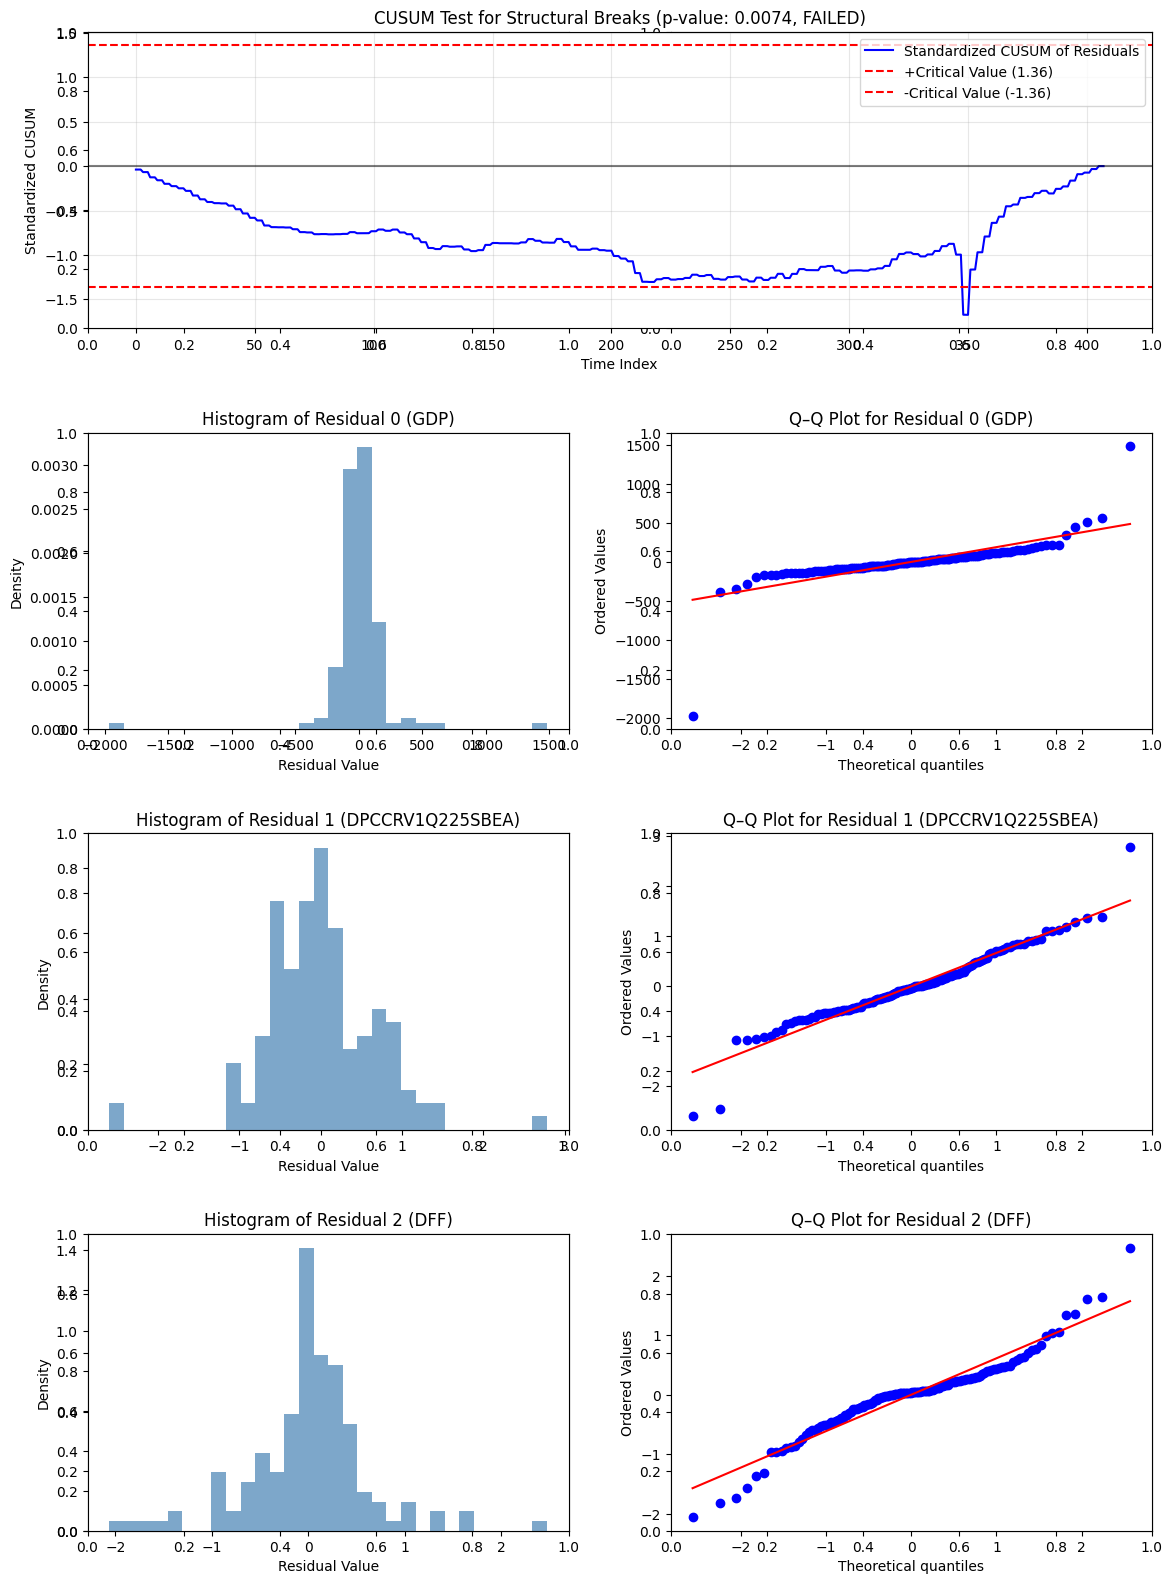

Plots are below


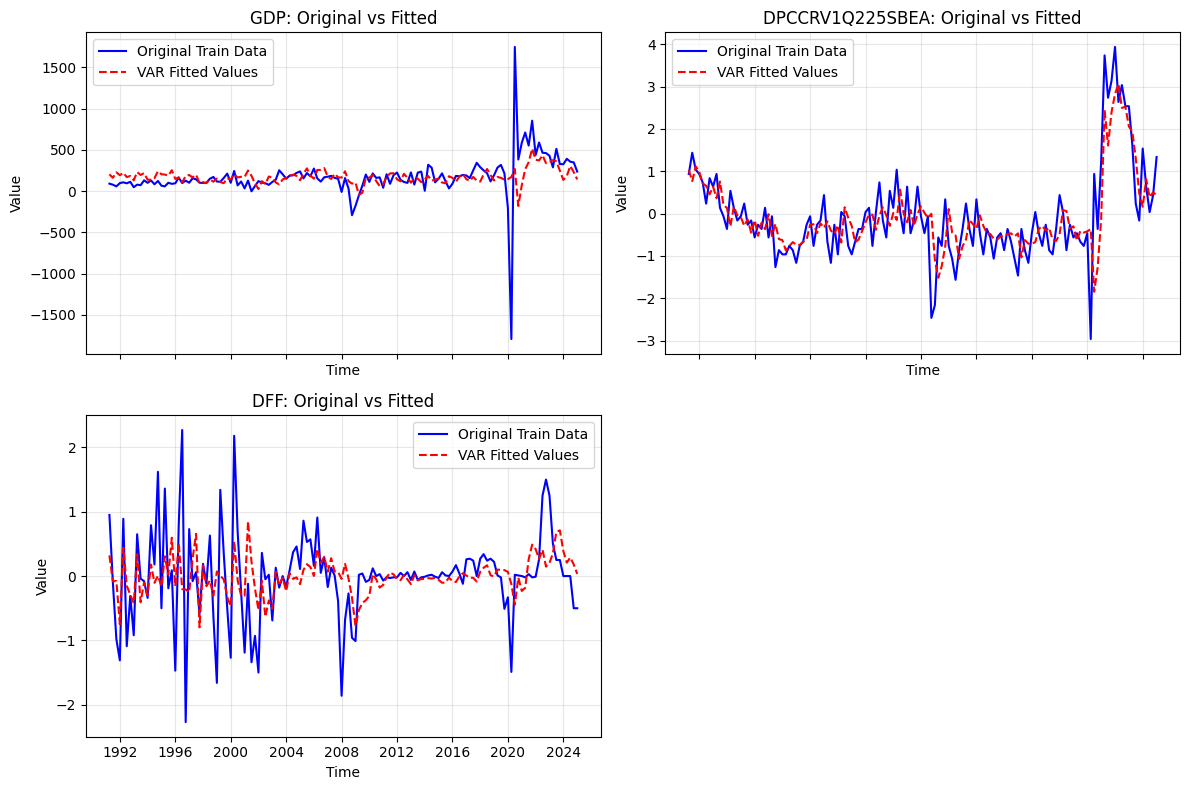

In [6]:
id=Struct_var.fit()

In [7]:
id=Struct_var.identify()

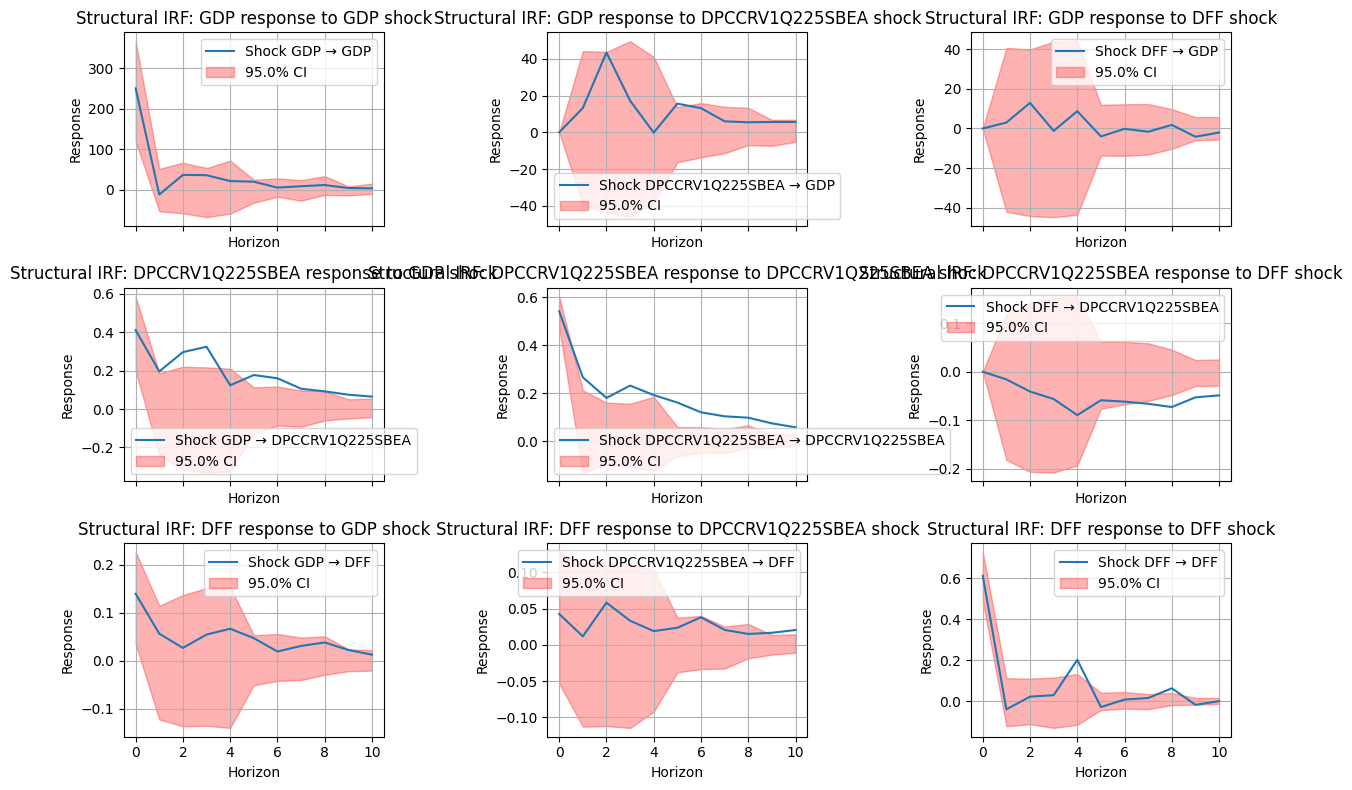

(array([[[ 2.50088129e+02,  0.00000000e+00,  0.00000000e+00],
         [ 4.10802717e-01,  5.41623760e-01,  0.00000000e+00],
         [ 1.39485667e-01,  4.24799820e-02,  6.11277879e-01]],
 
        [[-1.13998000e+01,  1.32205940e+01,  3.00080997e+00],
         [ 1.95962045e-01,  2.66670407e-01, -1.59200853e-02],
         [ 5.64168109e-02,  1.15645348e-02, -3.99005879e-02]],
 
        [[ 3.70893083e+01,  4.34128114e+01,  1.29680476e+01],
         [ 2.96433819e-01,  1.80938760e-01, -4.08635283e-02],
         [ 2.67256660e-02,  5.80982489e-02,  2.19317279e-02]],
 
        [[ 3.62861088e+01,  1.71748195e+01, -1.20051625e+00],
         [ 3.24525848e-01,  2.32403268e-01, -5.63910033e-02],
         [ 5.45490752e-02,  3.30837758e-02,  2.92090576e-02]],
 
        [[ 2.18420207e+01, -2.08950622e-01,  8.76379955e+00],
         [ 1.23631845e-01,  1.92900862e-01, -8.95561426e-02],
         [ 6.67106013e-02,  1.88252930e-02,  2.01669921e-01]],
 
        [[ 2.03215390e+01,  1.55705879e+01, -4.01206164

In [8]:
Struct_var.impulse_res(h=10,orth=True,bootstrap=True,plot=True)

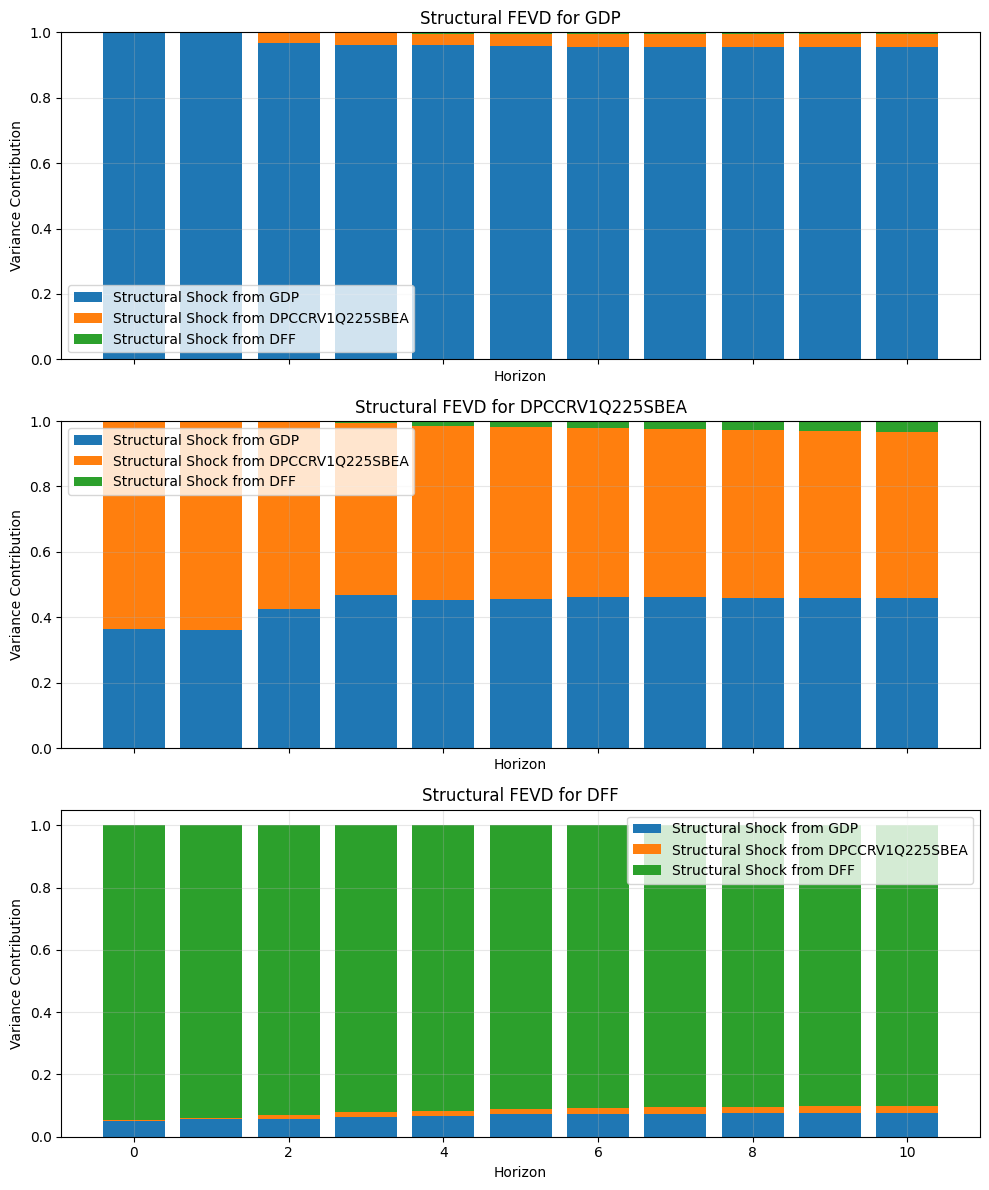

array([[[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.65187909e-01, 6.34812091e-01, 0.00000000e+00],
        [4.92661299e-02, 4.56938687e-03, 9.46164483e-01]],

       [[9.97076116e-01, 2.78062642e-03, 1.43257608e-04],
        [3.62242015e-01, 6.37314801e-01, 4.43183629e-04],
        [5.66218199e-02, 4.84777746e-03, 9.38530403e-01]],

       [[9.66258002e-01, 3.10691205e-02, 2.67287784e-03],
        [4.25018848e-01, 5.72210516e-01, 2.77063578e-03],
        [5.77480830e-02, 1.31396731e-02, 9.29112244e-01]],

       [[9.62694102e-01, 3.46752939e-02, 2.63060392e-03],
        [4.67331337e-01, 5.26711637e-01, 5.95702641e-03],
        [6.43230447e-02, 1.56556394e-02, 9.20021316e-01]],

       [[9.61873348e-01, 3.43953404e-02, 3.73131111e-03],
        [4.53161806e-01, 5.32529769e-01, 1.43084250e-02],
        [6.76765766e-02, 1.48694564e-02, 9.17453967e-01]],

       [[9.58503536e-01, 3.75685369e-02, 3.92792716e-03],
        [4.56976127e-01, 5.26065499e-01, 1.69583744e-02],
    

In [9]:
Struct_var.FEVD(plot=True)

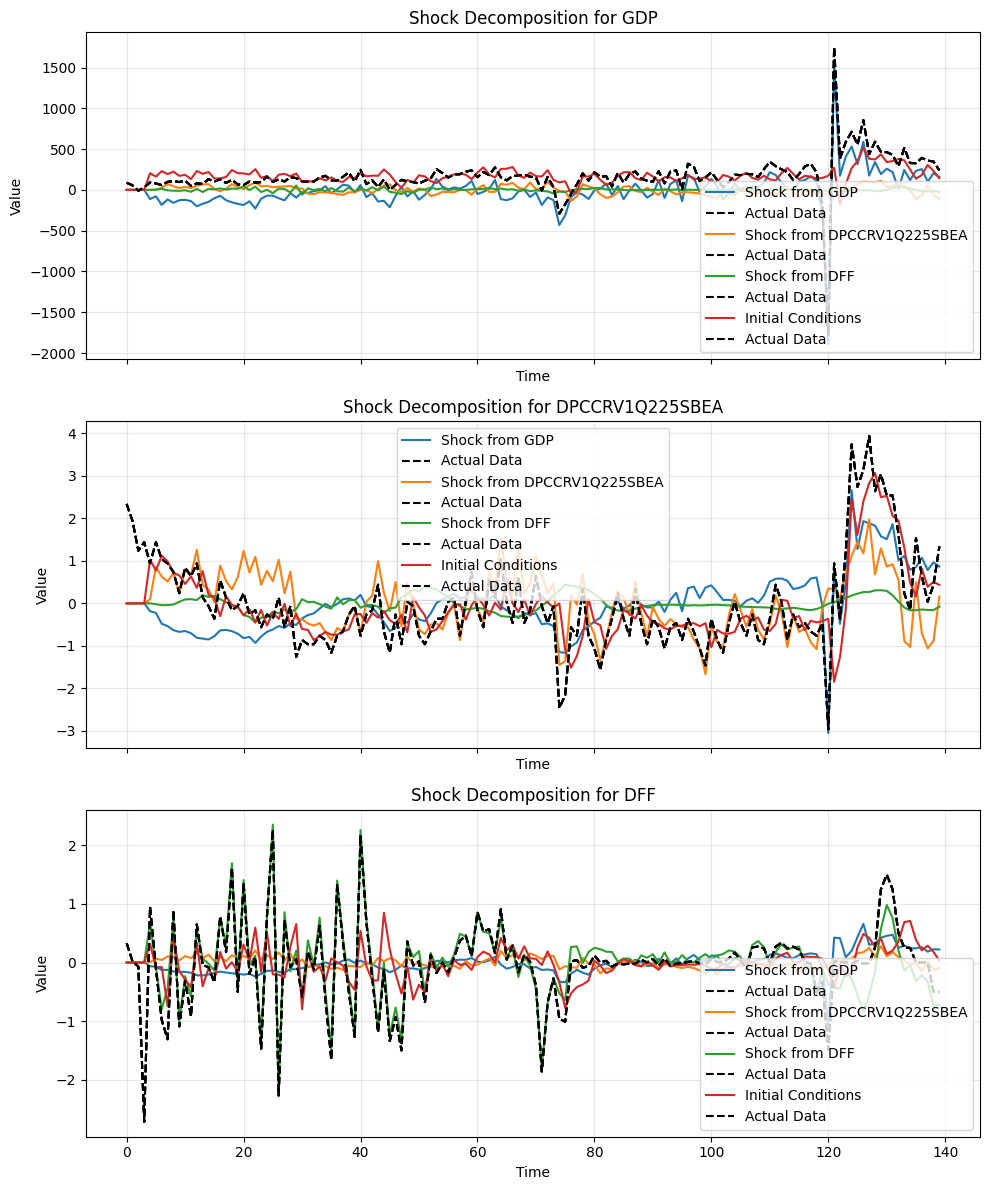

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       ...,

       [[ 1.01167137e+02,  5.75678577e+01, -1.93362127e+01,
          3.06061917e+02],
        [ 7.83939181e-01, -1.05800212e+00, -1.55635006e-01,
          3.88455645e-01],
        [ 1.86082052e-01

In [10]:
Struct_var.shock_decomposition(plot=True)

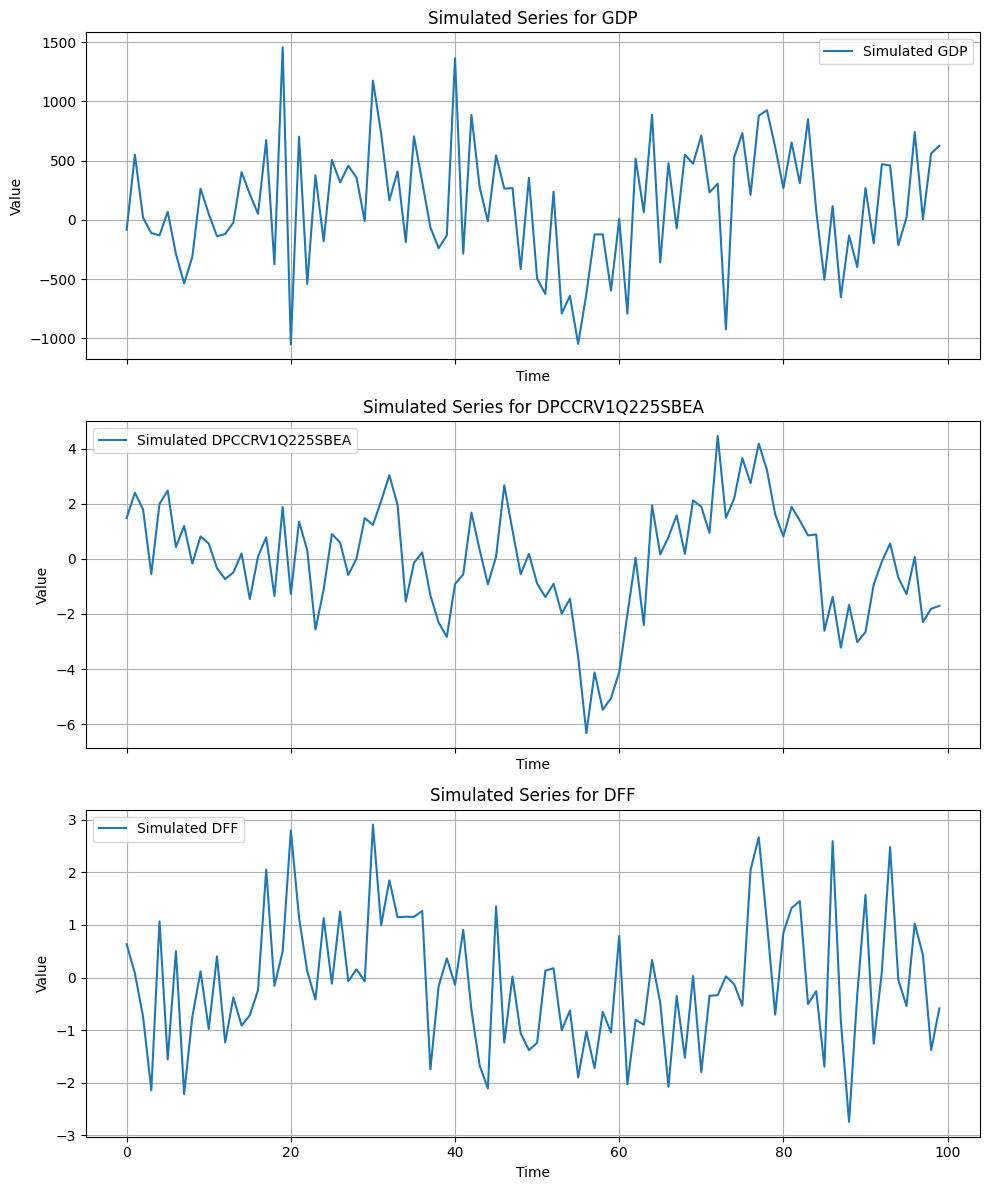

{'simulations': array([[-8.36373148e+01,  1.48169183e+00,  6.30973657e-01],
        [ 5.50651718e+02,  2.40139429e+00,  8.33180864e-02],
        [ 1.75549972e+01,  1.79218148e+00, -7.44804476e-01],
        [-1.11071935e+02, -5.50689795e-01, -2.14154229e+00],
        [-1.30717118e+02,  1.99271705e+00,  1.06776435e+00],
        [ 6.83560698e+01,  2.48067288e+00, -1.55640951e+00],
        [-2.86842920e+02,  4.29063656e-01,  4.99595973e-01],
        [-5.36066894e+02,  1.19386466e+00, -2.21462189e+00],
        [-3.11667592e+02, -1.70832559e-01, -7.44996621e-01],
        [ 2.63622723e+02,  8.14069504e-01,  1.17241021e-01],
        [ 5.02812183e+01,  5.55102498e-01, -9.76730283e-01],
        [-1.37680224e+02, -3.38705519e-01,  4.01302020e-01],
        [-1.19632944e+02, -7.33269755e-01, -1.23172526e+00],
        [-2.23406741e+01, -4.93764137e-01, -3.76330446e-01],
        [ 4.03263171e+02,  1.96297644e-01, -9.12349286e-01],
        [ 2.17796242e+02, -1.45898595e+00, -7.18434054e-01],
        [

In [11]:
Struct_var.simulate()